In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# 确保matplotlib能够显示中文
mpl.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
# 确保matplotlib能够正常显示负号
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
# 以下是通用函数
def z_score(tds, v=None):
    if v:
        return (v - tds.mean()) / tds.std()
    else:
        return (tds - tds.mean()) / tds.std()
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

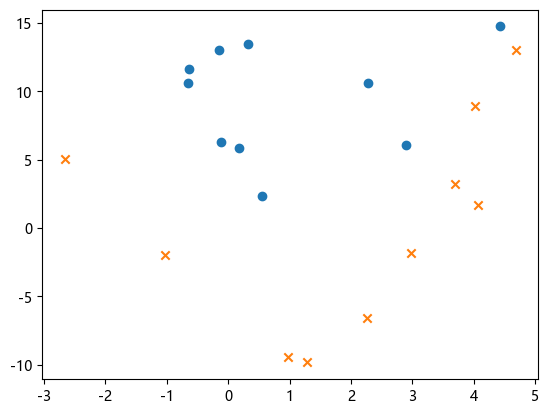

In [3]:
# 加载训练数据集
tds = np.loadtxt('dataset_逻辑回归_非线性可分.csv', delimiter=',', skiprows=1)
m = len(tds)
tds_x_1 = tds[:,0]
tds_x_2 = tds[:,1]
tds_y = tds[:,2]
c_0 = tds[tds[:,2]==0]
c_1 = tds[tds[:,2]==1]
plt.scatter(c_0[:,0], c_0[:,1], marker='o')
plt.scatter(c_1[:,0], c_1[:,1], marker='x')

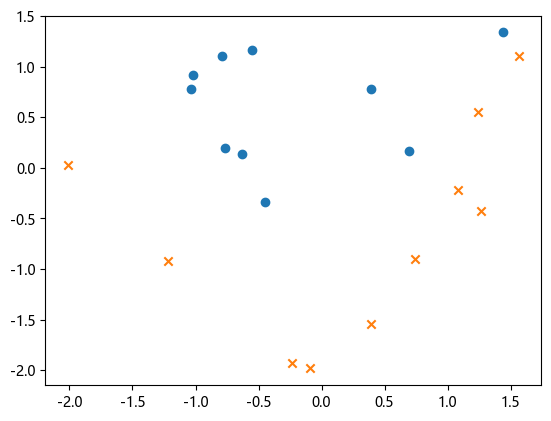

In [4]:
std_tds_x_1 = z_score(tds_x_1)
std_tds_x_2 = z_score(tds_x_2)
std_tds = np.vstack([std_tds_x_1, std_tds_x_2, tds_y]).T
std_c_0 = std_tds[std_tds[:,2]==0]
std_c_1 = std_tds[std_tds[:,2]==1]
plt.scatter(std_c_0[:,0], std_c_0[:,1], marker='o')
plt.scatter(std_c_1[:,0], std_c_1[:,1], marker='x')

In [5]:
def not_line_fun(theta, x):
    return np.dot(x, theta)

def f(theta, x):
    return sigmoid(not_line_fun(theta, x))

# 成本函数
def J(theta, x, tds_y):
    return - 1 / m * np.sum(np.dot(tds_y, np.log(f(theta, x))) + np.dot(1 - tds_y, np.log(1 - f(theta, x))))

# 批量梯度下降偏导
def pd_theta(theta, x, tds_y):
    return 1 / m * np.dot((f(theta, x) - tds_y), x)

θ： [-5.64998909  3.1632107  -8.12259193  5.00622325]


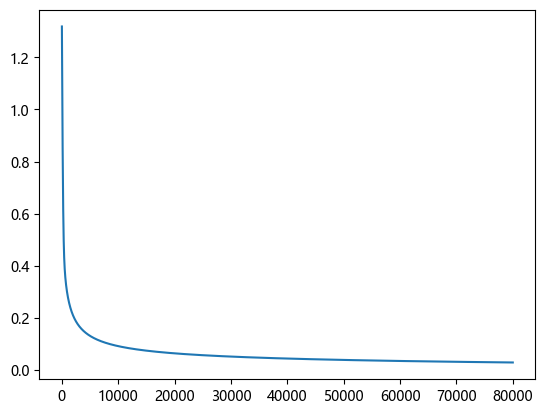

In [6]:
eta = 1e-2
train_x = np.vstack([np.ones(std_tds_x_1.shape[0]), std_tds_x_1, std_tds_x_2, np.power(std_tds_x_1, 2)]).T
theta = np.random.randn(4)
lst_iter_cnt = []
lst_cost = []
j_cost_cur = J(theta, train_x, tds_y)
epoch = 80000
for i in range(epoch):
    j_cost_pre = j_cost_cur
    tmp_theta = theta - eta * pd_theta(theta, train_x, tds_y)
    
    theta = tmp_theta
    
    j_cost_cur = J(theta, train_x, tds_y)
    
    lst_iter_cnt.append(i)
    lst_cost.append(j_cost_cur)
print("θ：", theta)
plt.plot(lst_iter_cnt, lst_cost)

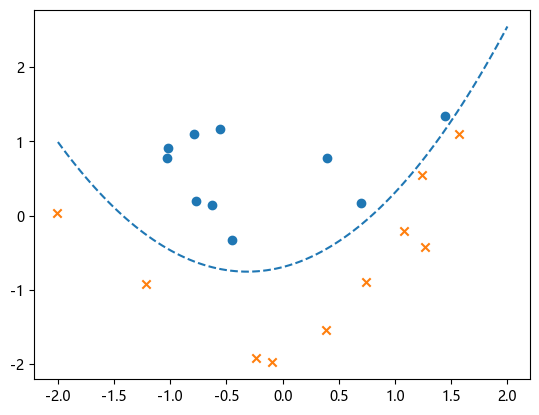

In [7]:
std_tds_x_1 = z_score(tds_x_1)
std_tds_x_2 = z_score(tds_x_2)
std_tds = np.vstack([std_tds_x_1, std_tds_x_2, tds_y]).T
std_c_0 = std_tds[std_tds[:,2]==0]
std_c_1 = std_tds[std_tds[:,2]==1]
plt.scatter(std_c_0[:,0], std_c_0[:,1], marker='o')
plt.scatter(std_c_1[:,0], std_c_1[:,1], marker='x')

plt_x = np.linspace(-2, 2, 100)
# 决策边界是函数not_line_fun为0
plt.plot(plt_x, -(theta[0] + theta[1] * plt_x + theta[3]* plt_x ** 2) / theta[2], linestyle='dashed')

In [8]:
# 分类函数
def classify(theta, x):
    return 1 if f(theta, x) >= 0.5 else 0

print(f(theta, np.array([1, z_score(tds_x_1, 3), z_score(tds_x_2, -2),z_score(tds_x_1, 3) ** 2])))
print(classify(theta, np.array([1, z_score(tds_x_1, 3), z_score(tds_x_2, -2),z_score(tds_x_1, 200) ** 3])))


print(f(theta, np.array([1, z_score(tds_x_1, 3), z_score(tds_x_2, 6), z_score(tds_x_1, 3)**2])))
print(classify(theta, np.array([1, z_score(tds_x_1, 3), z_score(tds_x_2, 6), z_score(tds_x_1, 3)**2])))

0.9990865500219746
1
0.1448649853602709
0
